In [1]:
!pip install ucimlrepo

S5      -0.001616
K5      -0.001223
S4      -0.001167
K4      -0.000394
S2      -0.000219
K2       0.000145
S1       0.000236
M0       0.000655
K1       0.001123
S3       0.001264
C5       0.001502
C2       0.001539
K3       0.001756
C3       0.002266
C4       0.003187
C1       0.003838
CLASS    1.000000
Name: CLASS, dtype: float64
<bound method DataFrame.info of          S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS  K1  K2  K3  K4  K5  \
0         1  10   1  11   1  13   1  12   1   1      9  10  11  13  12   1   
1         2  11   2  13   2  10   2  12   2   1      9  25  27  24  26  15   
2         3  12   3  11   3  13   3  10   3   1      9  40  39  41  38  29   
3         4  10   4  11   4   1   4  13   4  12      9  52  53  43  55  54   
5         1   2   1   4   1   5   1   3   1   6      8   2   4   5   3   6   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...  ..  ..  ..  ..  ..   
987613    1   9   1  10   1   7   2   8   1  11      4   9  10   7  22  11   
995108    

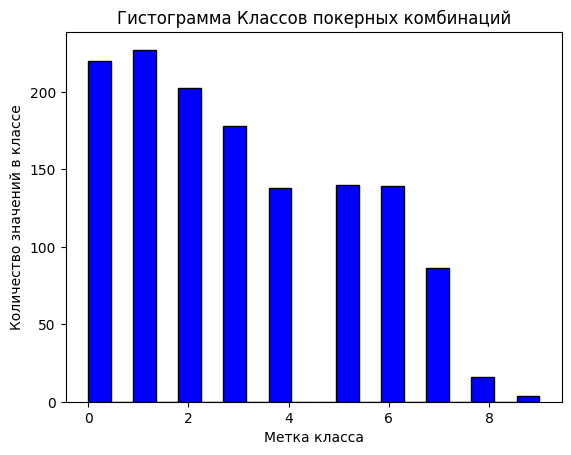

In [2]:
### Датасет - рука в покере
### Работа с сокращенным набором
### Обработка категориальных данных
import pandas as pd
from ucimlrepo import fetch_ucirepo

def data_load():
        ### Получить набор данных
    poker_hand = fetch_ucirepo(id=158)
    return(poker_hand)

def data_read(file):
        ### Загрузка данных
    data = pd.read_csv('data.csv', delimiter = ',')
    return(data)

########################################################

i = 0
if i == 0:
      ### Загрузка данных из библиотеки ucimlrepo
  poker_hand = data_load()
      ### Преобразование Данных в датафрейм
  x = poker_hand.data.features
  y = poker_hand.data.targets
      ### объединение двых датафреймов в один
  data = pd.merge(x, y, left_index=True, right_index=True)
else:
      ### Загрузка данных из библиотеки ucimlrepo
  data = data_read('data.svc')

### Как мы видим существует серьезный дисболанс в классах
###### Добавляем столбцы к датафрейму
data = data.assign(K1 = (data['S1']-1)*14 + data['C1'])
data = data.assign(K2 = (data['S2']-1)*14 + data['C2'])
data = data.assign(K3 = (data['S3']-1)*14 + data['C3'])
data = data.assign(K4 = (data['S4']-1)*14 + data['C4'])
data = data.assign(K5 = (data['S5']-1)*14 + data['C5'])
data = data.assign(M0 = data['K1'] + data['K2'] + data['K3'] + data['K4'] + data['K5'])
###!print(data.info)
###!print('-'*50)

# считаем уникальные значени для M0
###!print(data['M0'].value_counts())
###!print('-'*50)

### Строим матрицу корреляции
correlations_data = data.corr()['CLASS'].sort_values()
print(correlations_data)
print('='*50)

### Почистим наши данные от дубляжа строк
data_unique = data.drop_duplicates(subset=['M0', 'CLASS'], keep='first') # Оставляем первое значение в дубляжах
print(data_unique.info)
print('-'*50)

### считаем уникальные значени для целевого признака
print(data_unique['CLASS'].value_counts())
print('='*50)

### Строим матрицу корреляции
correlations_data = data_unique.corr()['CLASS'].sort_values()
print(correlations_data)
print('='*50)

### Построим гистограмму, она даст наглядное представление о дисбалансе
import matplotlib.pyplot as plt

plt.hist(data_unique['CLASS'].dropna(), bins = 20, color = 'blue', edgecolor = 'black');
plt.xlabel('Метка класса'); plt.ylabel('Количество значений в классе');
plt.title('Гистограмма Классов покерных комбинаций');


In [3]:
#==============================================================================================
### сначала разделим наши данные на входы и выходы
import numpy as np

X = data_unique.drop(['CLASS', 'K1', 'K2', 'K3', 'K4', 'K5', 'M0'], axis = 1)
print(X.info())
print('-'*50)

### обработка категориальных данных
X_dum = pd.get_dummies(X, columns = ['S1', 'S2', 'S3', 'S4', 'S5'])
print(X_dum.info())
print('='*50)
y_dum = data_unique.CLASS
print(y_dum.info())
print('='*50)

### Разбиваем датасеты для тестирования и валидации
### разделяем весь набор данных один раз для выделения обучающей выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dum, y_dum,
                                                    train_size=0.7,
                                                    random_state=42,
                                                    stratify=y_dum)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
print('-'*50)

### разделяем оставшиеся данные на датасеты для тестирования и валидации.
X2_train, X_val, y2_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.5,
                                                  random_state=42,
                                                  stratify=y_train)
print(f"Количество строк в y_train по классам: {np.bincount(y2_train)}")
print(f"Количество строк в y_val по классам: {np.bincount(y_val)}")
print('='*50)


<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 0 to 1019901
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      1350 non-null   int64
 1   C1      1350 non-null   int64
 2   S2      1350 non-null   int64
 3   C2      1350 non-null   int64
 4   S3      1350 non-null   int64
 5   C3      1350 non-null   int64
 6   S4      1350 non-null   int64
 7   C4      1350 non-null   int64
 8   S5      1350 non-null   int64
 9   C5      1350 non-null   int64
dtypes: int64(10)
memory usage: 116.0 KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 0 to 1019901
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C1      1350 non-null   int64
 1   C2      1350 non-null   int64
 2   C3      1350 non-null   int64
 3   C4      1350 non-null   int64
 4   C5      1350 non-null   int64
 5   S1_1    1350 non-null  

In [4]:
#==============================================================================================
### В первой модели использовал одну из наиболее эффективных
### древовидных моделей: XGBoost
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators = 4000, early_stopping_rounds = 50)
model.fit(X2_train, y2_train,
          eval_set = [(X2_train, y2_train), (X_val, y_val)],
          verbose = 100)
prediction = model.predict(X_val)

print(np.mean(prediction==y_val))
print('-'*50)

final_prediction = model.predict(X_test)

print(np.mean(y_test == final_prediction))
print('='*50)

from sklearn. metrics import classification_report
report = classification_report(y_test, final_prediction)
print(report)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, final_prediction)


[0]	validation_0-mlogloss:1.96756	validation_1-mlogloss:2.20076
[58]	validation_0-mlogloss:0.08269	validation_1-mlogloss:2.33790
0.2733050847457627
--------------------------------------------------
0.21674876847290642
              precision    recall  f1-score   support

           0       0.25      0.23      0.24        66
           1       0.23      0.31      0.26        68
           2       0.16      0.21      0.18        61
           3       0.19      0.19      0.19        54
           4       0.23      0.17      0.20        41
           5       0.54      0.31      0.39        42
           6       0.12      0.12      0.12        42
           7       0.24      0.15      0.19        26
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1

    accuracy                           0.22       406
   macro avg       0.20      0.17      0.18       406
weighted avg       0.23      0.22      0.22       406



array([[15, 18, 15,  5,  4,  4,  4,  0,  0,  1],
       [18, 21, 12,  6,  2,  1,  6,  2,  0,  0],
       [ 5, 14, 13, 11,  5,  2,  7,  4,  0,  0],
       [ 5, 16, 10, 10,  4,  0,  5,  3,  1,  0],
       [ 2,  8, 11,  5,  7,  1,  5,  2,  0,  0],
       [10,  6,  4,  3,  4, 13,  1,  0,  1,  0],
       [ 3,  8, 15,  7,  0,  0,  5,  2,  1,  1],
       [ 2,  1,  1,  6,  2,  0,  8,  4,  2,  0],
       [ 0,  1,  0,  0,  2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0]])

In [5]:
#==============================================================================================
#Несколько моделей на полных данных (считается ? часа)
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
#from skl2onnx import convert_sklearn
#from skl2onnx.common.data_types import FloatTensorType
#import onnxruntime as ort
import numpy as np
from sys import argv

# создаем молель SVC Classifier с линейным ядром
svc_model = SVC(kernel='linear', C=1.0)

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

# оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVC Classifier model:", accuracy)

print("\nПолный отчет классификации:\n", classification_report(y_test, y_pred))


Accuracy of SVC Classifier model: 0.19704433497536947

Полный отчет классификации:
               precision    recall  f1-score   support

           0       0.19      0.30      0.24        66
           1       0.19      0.38      0.25        68
           2       0.19      0.26      0.22        61
           3       0.13      0.09      0.11        54
           4       0.00      0.00      0.00        41
           5       0.67      0.19      0.30        42
           6       0.19      0.12      0.14        42
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1

    accuracy                           0.20       406
   macro avg       0.16      0.13      0.13       406
weighted avg       0.20      0.20      0.17       406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#==============================================================================================
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

import numpy as np

# create a LinearSVC model
linear_svc_model = LinearSVC(C=1.0, max_iter=10000)

# train the model on the entire dataset
linear_svc_model.fit(X_train, y_train)

# predict classes for the entire dataset
y_pred = linear_svc_model.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of LinearSVC model:", accuracy)

# display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of LinearSVC model: 0.16502463054187191

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.21      0.18        66
           1       0.19      0.41      0.26        68
           2       0.13      0.15      0.14        61
           3       0.09      0.07      0.08        54
           4       0.00      0.00      0.00        41
           5       0.80      0.19      0.31        42
           6       0.14      0.10      0.11        42
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1

    accuracy                           0.17       406
   macro avg       0.15      0.11      0.11       406
weighted avg       0.19      0.17      0.15       406



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z